In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("imdb.csv")

#### 1.1) Removing Columns

In [98]:
del df['Poster_Link']
del df['Released_Year']
del df['Certificate']
del df['Runtime']
del df['IMDB_Rating']
del df['Overview']
del df['Meta_score']
del df['Star1']
del df['Star2']
del df['Star3']
del df['Star4']
del df['No_of_Votes']
del df['Gross']

df.head()

,Series_Title,Genre,Director
0,The Shawshank Redemption,Drama,Frank Darabont
1,The Godfather,"Crime, Drama",Francis Ford Coppola
2,The Dark Knight,"Action, Crime, Drama",Christopher Nolan
3,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola
4,12 Angry Men,"Crime, Drama",Sidney Lumet


#### 1.2) Checking Null Values

In [99]:
df.isnull().sum()

Series_Title    0
Genre           0
Director        0
dtype: int64

#### 1.3) Finding All Genre

In [100]:
genre = []

for i in df['Genre']:
    
    genre += [j.strip() for j in i.split(',')]
    
genre = list(set(genre))

#### 1.4) Count No. of Movies in Each Genre

In [101]:
data = []

for g in genre:    
    c = 0
    for i in df['Genre']:   
        gen = [j.strip() for j in i.split(',')]
        if (g in gen):
            c += 1
    data.append([g , c])
    
df_ = pd.DataFrame(data, columns = ['Genre','Freq'])
df_

,Genre,Freq
0,Crime,209
1,Animation,82
2,Musical,17
3,Thriller,137
4,History,56
5,Horror,32
6,Music,35
7,Biography,109
8,Romance,125
9,War,51


#### 1.5) Top 5 Genre in terms of number of Movies

In [102]:
df_.sort_values(by = 'Freq', ascending = False).head()

,Genre,Freq
12,Drama,724
20,Comedy,233
0,Crime,209
13,Adventure,196
17,Action,189


#### 1.6) Gerne Distribution in Movies (Visualization)

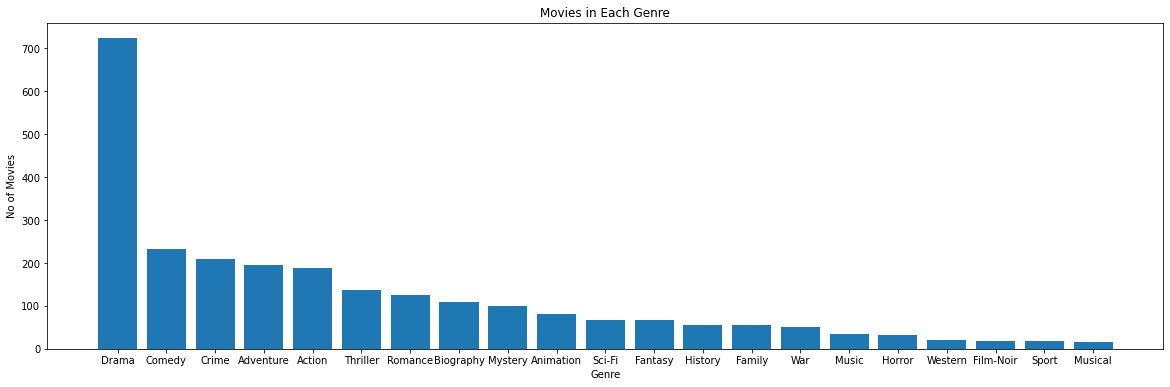

In [103]:
x = df_.sort_values(by = 'Freq', ascending = False)['Genre'].values
y = df_.sort_values(by = 'Freq', ascending = False)['Freq'].values

fig ,ax = plt.subplots(figsize = (20,6))

ax.bar(x,y)

plt.xlabel('Genre')
plt.ylabel('No of Movies')
plt.title('Movies in Each Genre')

plt.show()

#### 2.1) Finding Number of Moviews Director by each Director

In [104]:
data = []

directors = list(set(df['Director']))

for director in directors:
    data.append([director, list(df['Director']).count(director)])
    
df_ = pd.DataFrame(data, columns = ['Director','Freq'])

df_.head()

,Director,Freq
0,Ivan Reitman,1
1,Paul Verhoeven,1
2,Nicholas Ray,2
3,Robert Stevenson,1
4,Bernardo Bertolucci,2


#### 2.2) Top 10 Directors with most Number of Movies (Visualize)

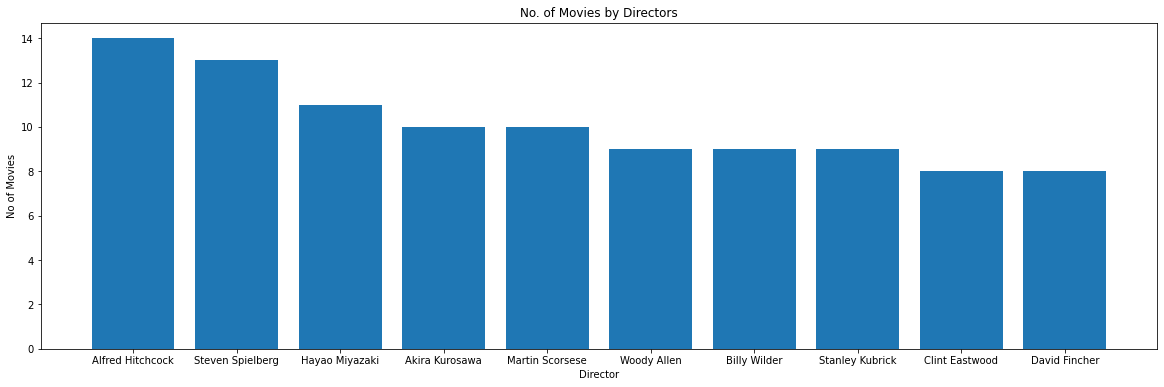

In [105]:
x = df_.sort_values(by = 'Freq', ascending = False).head(10)['Director'].values
y = df_.sort_values(by = 'Freq', ascending = False).head(10)['Freq'].values

fig ,ax = plt.subplots(figsize = (20,6))

ax.bar(x,y)

plt.xlabel('Director')
plt.ylabel('No of Movies')
plt.title('No. of Movies by Directors')

plt.show()